# Syria Telecommunication Customer Churn

**Data Scientist:** Anhduy (Andy) Nguyen, Woojin Jun 

**Date:** June 1, 2022

### Stake Holder
- Syria Telecommunication

## Business Understanding

Syria Telecommunications a telecom company has expressed interest in increasing customer retention/reducing customer churn for their user base.  They have reached out to us a cohort of trained data scientists to recommend an optimized strategy to decrease customer churn.  This analysis will use different statistical analysis tool and classifiers including, but not limited to, logistic regression, train-test split, OneHotEncoder, cross-validation, and decision trees to find what features have the highest impact on customer churn.

### Business Problem

1. What are the effects of customer service calls on customer churn?
2. Does the charge on customers during the day effect customer churn?
3. Does having or not having an international plan effect customer churn?

## Data Understanding

The main data set that was used was the Syria Telecommunication data set named ('data/bigml_59c28831336c6604c800002a.csv'). The data set was then cleaned before analysis was run on it.

### Data Set Features
- State, Account Length, Area Code, Phone Number, International Plan(Yes or No), Voice Mail Plan(Yes or No), Number of Voice Mail Messages, Total of Day, Evening, Night, and International Minutes, Total of Day, Evening, Night, and International Calls, Total of Day, Evening, Night, and International Charges, Number of Customer Service Calls, and Churn(Yes or No)

### Import Libraries

In [1]:
# Importing used Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, \
RandomizedSearchCV, KFold

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix, plot_roc_curve, \
make_scorer, recall_score, precision_score, f1_score

#### Convenient Viewing Code 

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Importing Data Set

In [3]:
# Importing SyriaTel data set through Pandas

df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

### 1.A Exploring Data

In [4]:
# Running df head to see data set

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False


In [5]:
# replace spaces with underscores

df.columns = df.columns.str.replace(' ', '_')

In [6]:
# Running df describe to see statistical info

df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


Values are reasonable and there doesn't seem to be any outliers

In [7]:
# Running df info to see column names, datatypes and possible nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [8]:
# Checking for null values
# Sanity check to check for nulls again

df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

It appears there are no null values in the data set after two checks on our dataframe.

Most features are of numerical datatype except for **state, phone_number, international_plan, and voice_mail_plan** which are strings and **churn** which is a boolean.

In [9]:
# Looking for duplicated data in Phone Nubmer would be the only column where looking for duplicated data makes sense

print(df.duplicated().sum())
df['phone_number'].duplicated().sum()

0


0

There seem to be no duplicates on the dataframe.

In [10]:
for col in df.columns:
    print(f"{col} vals:  {df[col].value_counts()} \n")

state vals:  WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
WA     66
NV     66
CO     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ND     62
ME     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64 

account_length vals:  105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account_length, Length: 212, dtype: int64 

area_code vals:  415    1655
510     840
408     838
Name: area_code, dtype: int64 

phone_number vals:  356-5244    1
384-1621    1
367-2227    1
409-9885    1
370-5361    1
           ..
406-4100    1
347-9968    1
395-7923    1
348-6659    1
389-5649    1
Name: ph

- All **states** look normal and there are no outliers
- **account_length** seems to have a decent spread
- Suprisingly there only seems to be three **area_code** values
- No duplicates on the **phone_number**, dropping because has zero indication of if customer will churn or not
- **international_plan and voice_mail_plan** seem to be boolean indicators well change into 1,0 or True,False later
- **number_vmail_messages** looks normal with multiple customers having more than 10 voicemail messages logged
- the values of **minutes, call, and charges** are within reason
- **customer_service_calls** seems to have a normal spread
- **churn** indicates True or False as expected

### 1.B Cleaning Data

In [11]:
# Making a copy of the original data set so the original data set keeps its integrity

df_copy = df.copy()

In [12]:
# Running df copy to make sure it works

df_copy

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


In [13]:
# Dropping Phone Number

df_copy = df_copy.drop('phone_number', axis = 1)

Dropping Phone Number because it is irrelevant to churn

In [14]:
# Sanity Check

df_copy

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,415,no,no,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,510,no,no,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


In [15]:
# Checking count of area code

df_copy.value_counts("area_code")

area_code
415    1655
510     840
408     838
dtype: int64

In [16]:
# Checking rate of area code towards churn

df_copy.groupby("area_code")['churn'].mean()

area_code
408   0.15
415   0.14
510   0.15
Name: churn, dtype: float64

Doesn't look like area code effects churn where the churn rate is about 15%

In [17]:
# Dropping area code

df_copy = df_copy.drop("area_code", axis = 1)

In [18]:
# Sanity check

df_copy

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,no,no,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,no,no,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,yes,no,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


From analysis above dropping area code because it has the same churn rate on all three area codes

In [19]:
# Changing International Plan into 0, 1 boolean integer for easier analysis

df_copy['international_plan'] = df_copy["international_plan"].apply(lambda x: x.replace('no', '0'))
df_copy['international_plan'] = df_copy["international_plan"].apply(lambda x: x.replace('yes', '1'))
df_copy['international_plan'] = df_copy['international_plan'].astype('int64')

# Changing Voice Mail Plan into 0, 1 boolean interger for easier analysis

df_copy['voice_mail_plan'] = df_copy["voice_mail_plan"].apply(lambda x: x.replace('no', '0'))
df_copy['voice_mail_plan'] = df_copy["voice_mail_plan"].apply(lambda x: x.replace('yes', '1'))
df_copy['voice_mail_plan'] = df_copy['voice_mail_plan'].astype('int64')

In [20]:
# Sanity Check
df_copy

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,0,1,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,0,0,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,1,0,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,1,0,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,0,0,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,0,0,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,1,0,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


Replacing Yes and No in international plan and voice mail plan into 1's and 0's for easier analysis

In [21]:
# Making Clean Data set to be used from now on

df_clean = df_copy.copy()

In [22]:
# Sanity Check

df_clean

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,0,1,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,0,0,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,1,0,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,1,0,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.20,77,26.55,215.50,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,0,0,0,231.10,57,39.29,153.40,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,0,0,0,180.80,109,30.74,288.80,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,1,0,0,213.80,105,36.35,159.60,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False


### 1.C Exploring Churn

In [23]:
# Check the Counts of churn

df_clean.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

Shows that the data in the data set is unbalanced and could possible use SMOTE later on

In [24]:
# Show  the churn counts in percentages

df_clean.churn.value_counts()/len(df_copy.churn)

False   0.86
True    0.14
Name: churn, dtype: float64

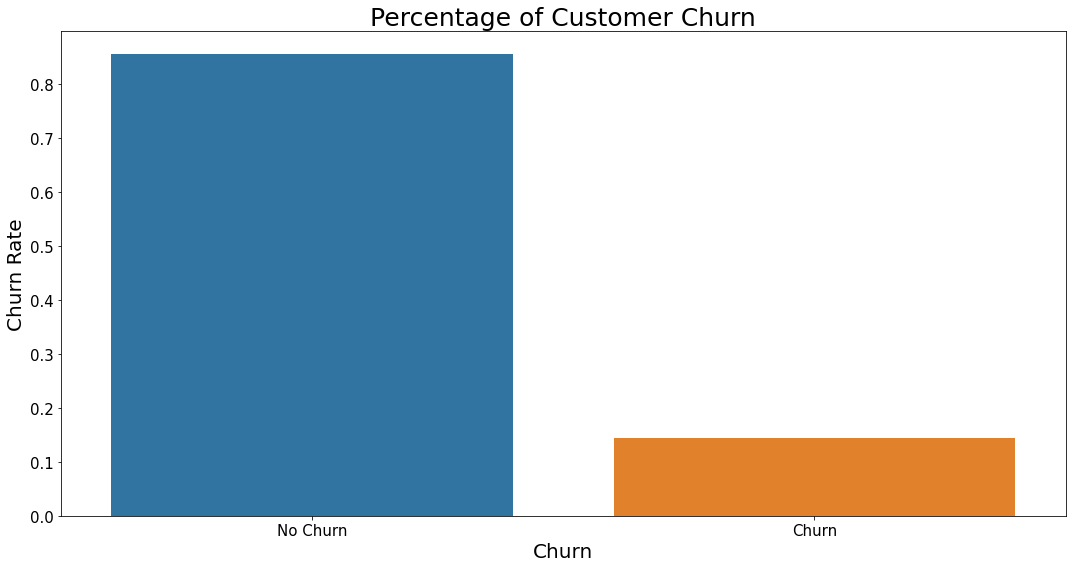

In [25]:
# Visualizing churn percentage

fig, ax = plt.subplots(figsize = (15,8))

sns.barplot(x = [0,1], y= df_clean.churn.value_counts()/len(df_clean.churn), data = df, ax = ax)

plt.title('Percentage of Customer Churn', fontsize = 25)

ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Churn', fontsize = 20)

plt.ylabel('Churn Rate', fontsize = 20)

ax.set_xticklabels(['No Churn', 'Churn'])

plt.tight_layout()

plt.savefig('img/Percentage_Customer_Churn.png', bbox_inches = "tight")

Shows around a 14% churn rate for all customers.

### 1.D Heat Maps and Correlations

In [26]:
# Running a correlation on churn

df_clean.corr().churn.sort_values(ascending= False)

churn                     1.00
international_plan        0.26
customer_service_calls    0.21
total_day_minutes         0.21
total_day_charge          0.21
total_eve_minutes         0.09
total_eve_charge          0.09
total_intl_charge         0.07
total_intl_minutes        0.07
total_night_charge        0.04
total_night_minutes       0.04
total_day_calls           0.02
account_length            0.02
total_eve_calls           0.01
total_night_calls         0.01
total_intl_calls         -0.05
number_vmail_messages    -0.09
voice_mail_plan          -0.10
Name: churn, dtype: float64

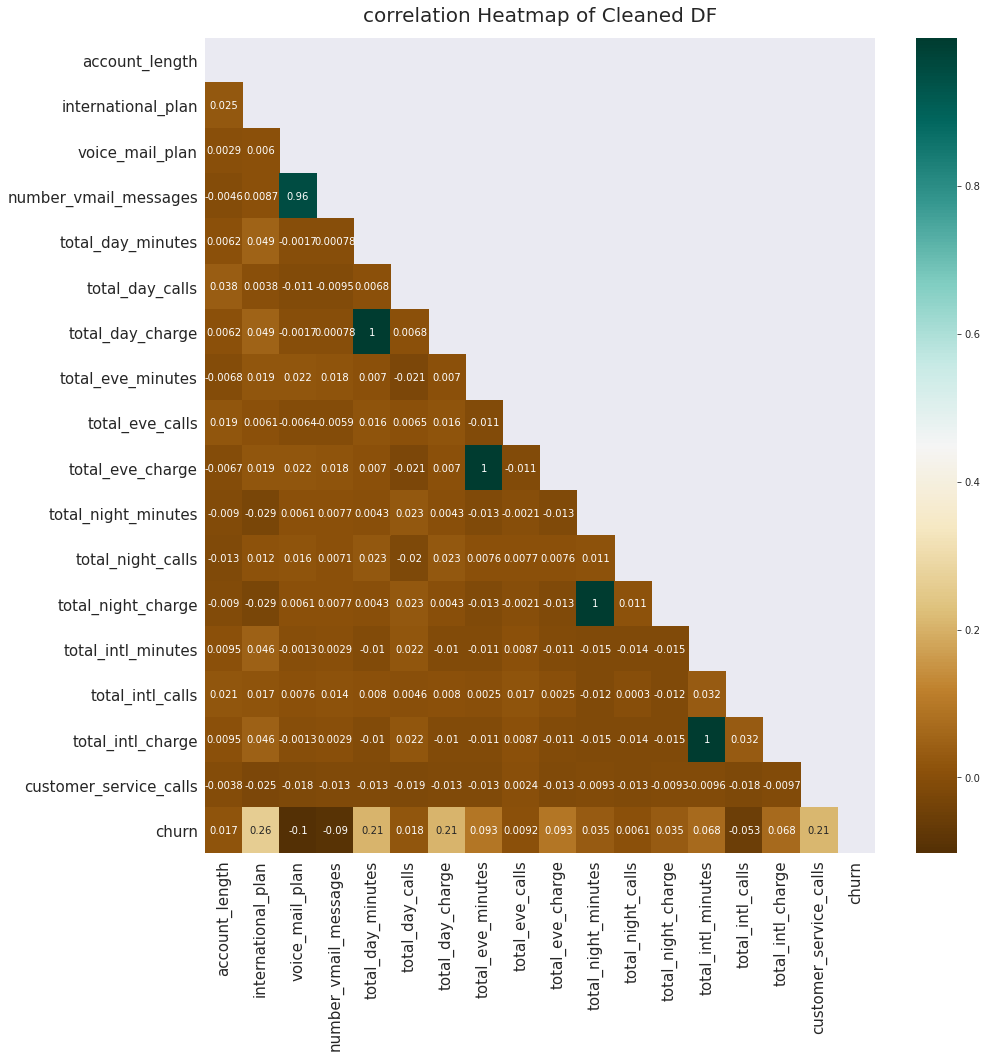

In [27]:
# heat mapp with information

with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(15,15))
    
    mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
    
    plt.xticks(fontsize = 15)
    
    plt.yticks(fontsize = 15)
    
    heatmap = sns.heatmap(df_clean.corr(), annot = True, mask = mask, cmap = "BrBG")
    
    heatmap.set_title("correlation Heatmap of Cleaned DF", fontdict={'fontsize': 20}, pad =16)

- Heat map on correlations indicated that **international_plan, total_day_minutes, total_day_charge, and customer_service_calls** have the highest correlations towards churn
- Heat map also indicates that **total_day_minutes and total_day_charge** have a correlation of 1 to 1 which is the same for evening, night, and international

## 2 Data Modeling

### 2.A Preparing Data

In [28]:
# create X:
X = df_clean.drop('churn', axis = 1)

# create y:
y = df_clean.churn

In [29]:
#Initial split:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .25, 
                                                    random_state = 42)

### 2.B Model 1 Dummy Model

In [30]:
# Running a dummy model
dummy_model = DummyClassifier(strategy = "most_frequent")

dummy_model.fit(X_train, y_train)

cv_results = cross_val_score(dummy_model, X_train, y_train, cv = 5)
cv_results

array([0.858     , 0.856     , 0.856     , 0.856     , 0.85771543])

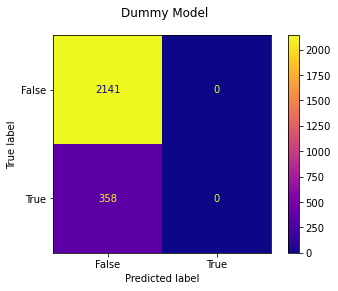

In [31]:
# Confusion Matrix for Dummy Model

fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

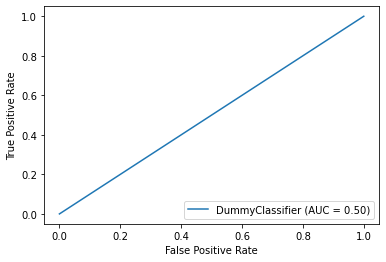

In [32]:
# Area under the curve for Dummy Model

plot_roc_curve(dummy_model, X_train, y_train);

In [33]:
y_pred = dummy_model.predict(X_test)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 85.01199040767386
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For our first Dummy Model we recieved a Accuracy score of 85% and a recall and precision score of Zero each.  This is because we have zero FP and zero TP so it is not a great model and it only recieves 50% of the data under the curve.

### 2.C  Model 2 Decision Tree Model

### 2.C.1 Running OneHotEncoder, Standard Scaler, and SMOTE to scale, even out data, and categorize States

In [34]:
# One hot Encode state
ohe = OneHotEncoder(sparse = False, handle_unknown= "ignore")

# fit ohe on small train data
ohe.fit(X_train[['state']])
ohe.fit(X_test[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)
train_test_encoded = pd.DataFrame(ohe.transform(X_test[["state"]]), 
                               index = X_test.index, 
                               columns = col_names)
# combine encoded states with X_t and drop old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)
X_test = pd.concat([X_test.drop("state", axis = 1), train_test_encoded], axis = 1)

# SMOTE data set because it is uneven
sm = SMOTE(random_state = 42, sampling_strategy = .35)

# Fit and trsnform X_train and y_train using sm
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Scaled data

# Instantiat Scaler
scaler = StandardScaler()

#fit and transform X_train_smote
X_train_scaled_smote = scaler.fit_transform(X_train_smote)

#Transform X_test
X_test_scaled = scaler.fit_transform(X_test)

We categorize state by OneHotEnoding it, SMOTE the data to remove some imblance which was previously 85 : 15 to around 74:26, and scaled the data to make it easier to analyze

In [35]:
# Running Decision Tree

dt = DecisionTreeClassifier(max_depth = 5, 
                            random_state = 42)
dt.fit(X_train_scaled_smote,y_train_smote)

cv_results = cross_val_score(dt, X_train_scaled_smote, y_train_smote, cv = 5)
cv_results

array([0.91349481, 0.87889273, 0.87889273, 0.88408304, 0.85640138])

These are decent accuracy scores

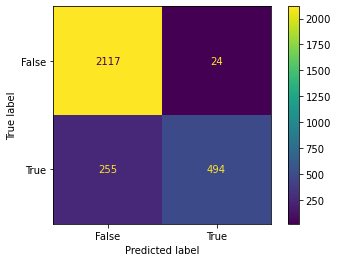

In [36]:
# Plot Confusion Matrix

plot_confusion_matrix(dt,X_train_scaled_smote,y_train_smote)

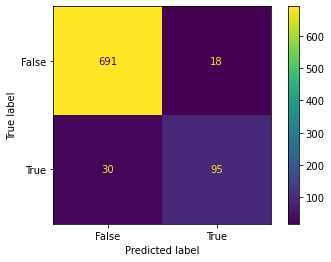

In [37]:
# Plot Confusion Matrix

plot_confusion_matrix(dt,X_test_scaled,y_test)

We are able to see FP and TP now, with a reduced number in FN

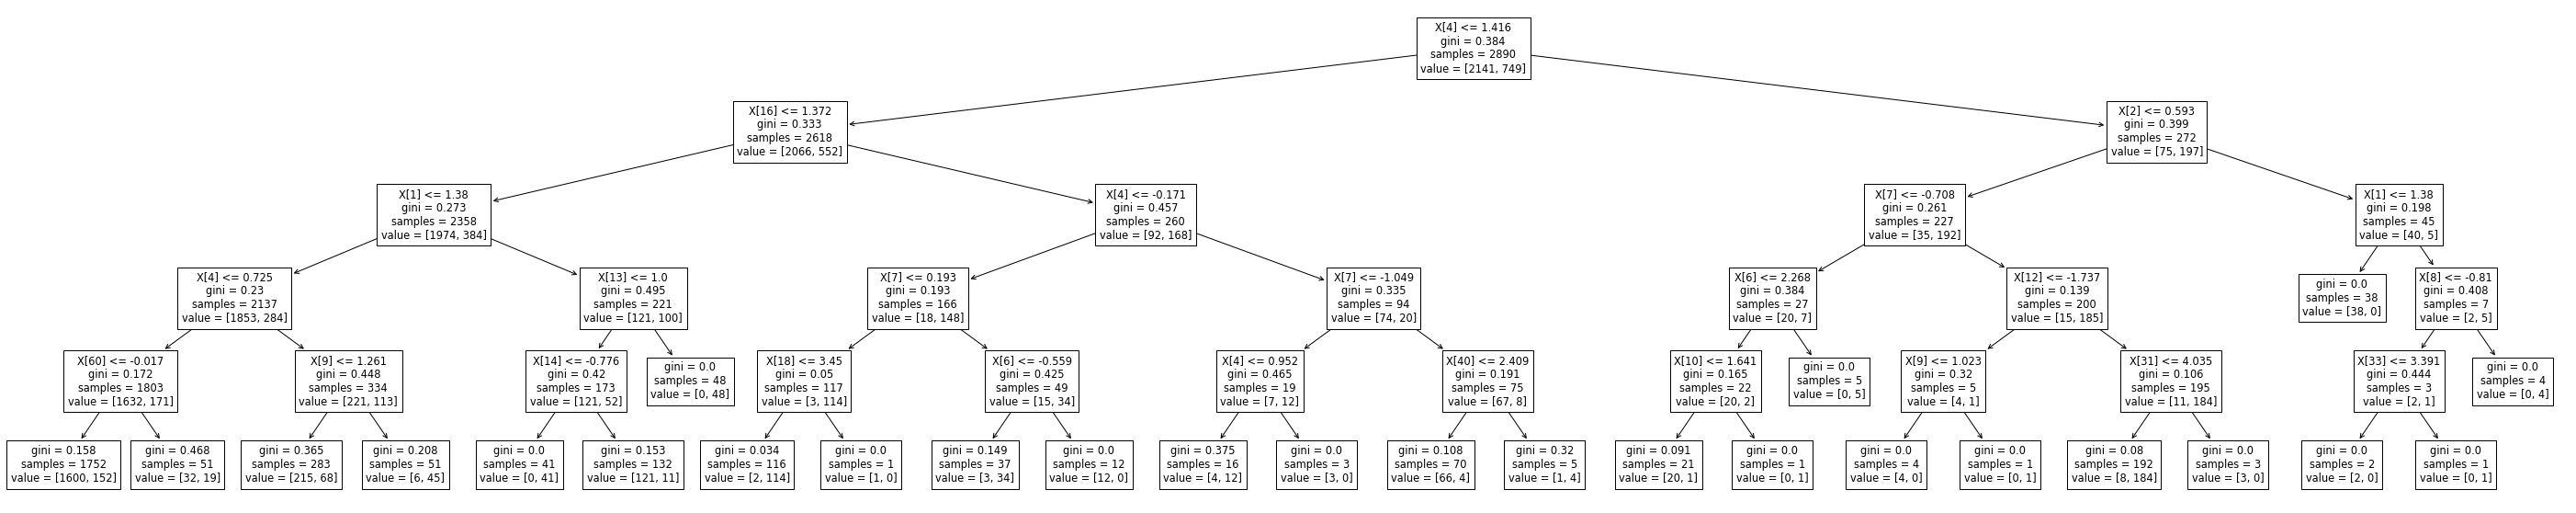

In [38]:
# Plot Decision Tree

f, ax = plt.subplots(figsize=(50, 10))
plot_tree(dt, ax=ax);

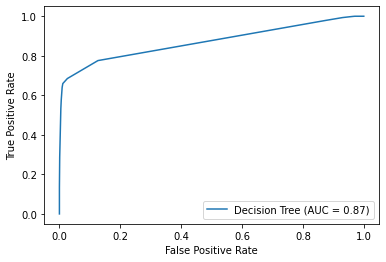

In [39]:
# Plot AUC for DT

fig, ax = plt.subplots()

plot_roc_curve(dt, X_train_scaled_smote, y_train_smote, 
               name='Decision Tree', ax=ax)

Increased our area under the curve from 50% to 87%

In [40]:
# Recieve Accuracy, Recall, and Precision Scores

y_pred = dt.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred, average = "binary") * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 94.24460431654677
Recall: 76.0
Precision: 84.070796460177
F1 Score: 79.83193277310924


Increased our accuracy score to 94%, Recall score to  76%, and Precision Score to 84%

In [41]:
# Looking for feature importance

for fi, feature in zip(dt.feature_importances_, X_train_smote):
    print(fi, feature)

0.0 account_length
0.07423550722744135 international_plan
0.0641116302354747 voice_mail_plan
0.0 number_vmail_messages
0.35019485478485646 total_day_minutes
0.0 total_day_calls
0.03484669754411439 total_day_charge
0.05514685824959279 total_eve_minutes
0.002409591319925723 total_eve_calls
0.058870214507639886 total_eve_charge
0.0027381719544610486 total_night_minutes
0.0 total_night_calls
0.008524798137261248 total_night_charge
0.05813213900157059 total_intl_minutes
0.0831337297179973 total_intl_calls
0.0 total_intl_charge
0.17299395986844085 customer_service_calls
0.0 AK
0.0030283673402448285 AL
0.0 AR
0.0 AZ
0.0 CA
0.0 CO
0.0 CT
0.0 DC
0.0 DE
0.0 FL
0.0 GA
0.0 HI
0.0 IA
0.0 ID
0.008579535247773995 IL
0.0 IN
0.002108392404935007 KS
0.0 KY
0.0 LA
0.0 MA
0.0 MD
0.0 ME
0.0 MI
0.008144418661348941 MN
0.0 MO
0.0 MS
0.0 MT
0.0 NC
0.0 ND
0.0 NE
0.0 NH
0.0 NJ
0.0 NM
0.0 NV
0.0 NY
0.0 OH
0.0 OK
0.0 OR
0.0 PA
0.0 RI
0.0 SC
0.0 SD
0.0 TN
0.012801133796920746 TX
0.0 UT
0.0 VA
0.0 VT
0.0 WA
0.0 WI


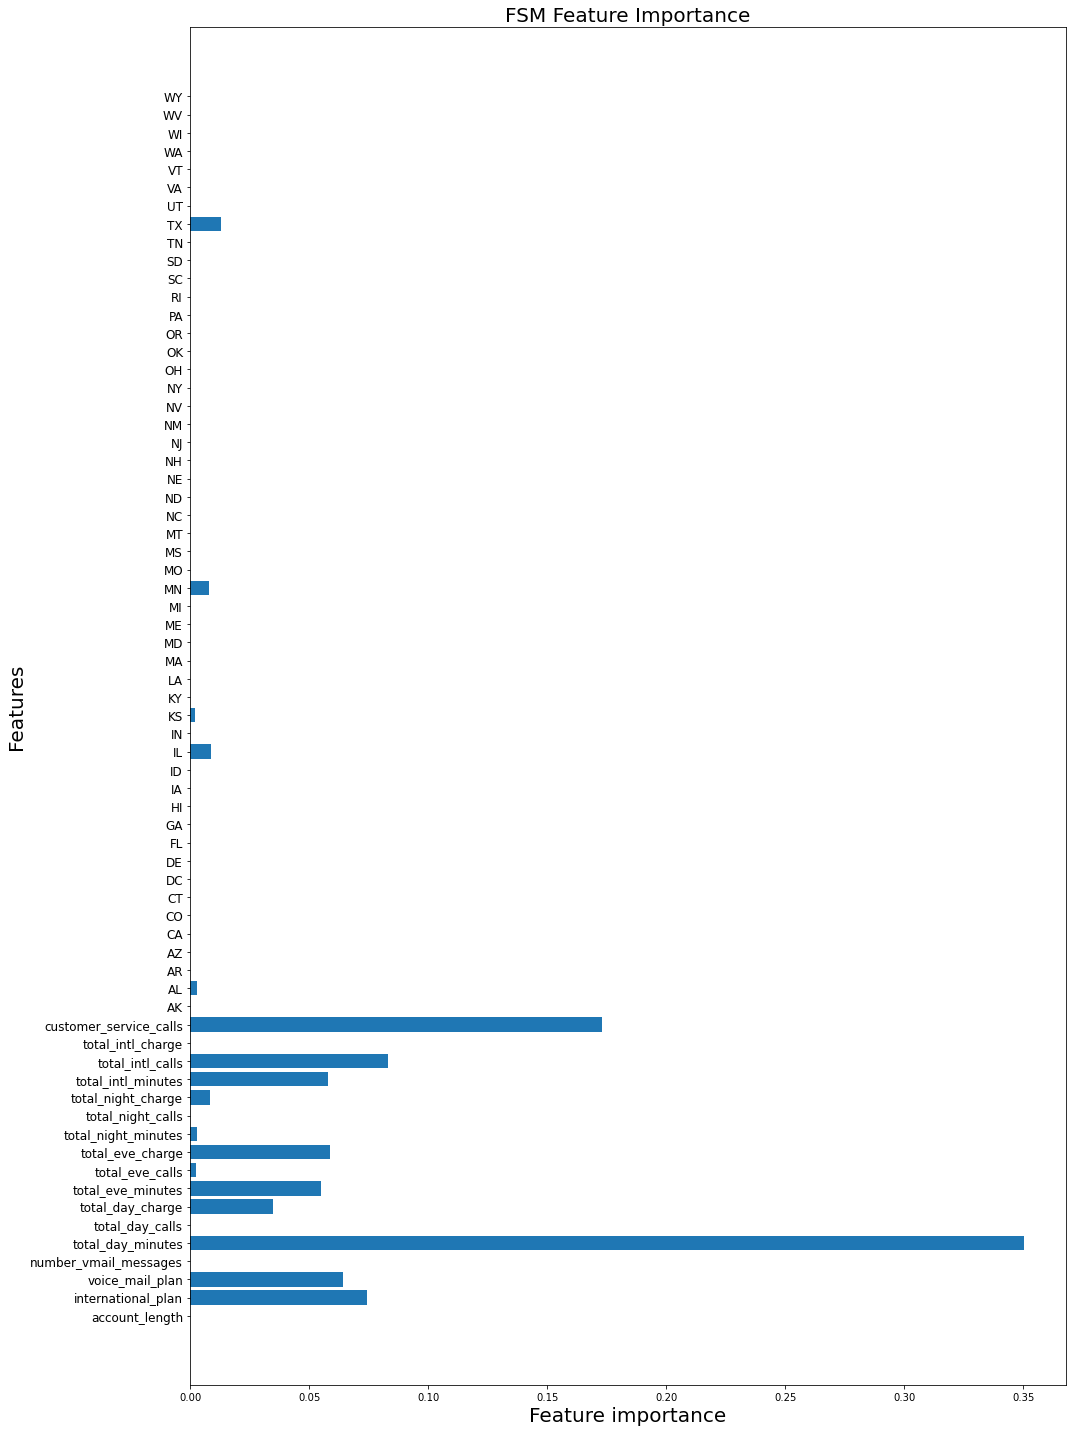

In [42]:
n_features = dt.n_features_
plt.figure(figsize=(15, 20))
plt.barh(range(n_features), dt.feature_importances_);
plt.yticks(np.arange(n_features), X_train_smote.columns.values, fontsize = 12) 
plt.xlabel('Feature importance', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.title('FSM Feature Importance', fontsize = 20)
plt.tight_layout()
plt.savefig('img/FeatureImportance.png', bbox_inches = "tight")

Using the decision Tree Feature importance we find that **Total_day_minutes** which is interchangeable with **total_day_charge**, **customer_service_calls**, and **international_plan** to be of great importance similiar to our correlation heat map above.  We should use these specific features and any features that show importance and run a more refined Decision Tree and Logistic Regression Model.

### 1.E Secondary EDA on Important features

In [43]:
# International Plan feature

df_clean.groupby('international_plan').mean().reset_index()

,international_plan,account_length,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,100.74,0.28,8.06,178.89,100.41,30.41,200.66,100.07,17.06,201.35,100.03,9.06,10.20,4.47,2.75,1.57,0.11
1,1,104.07,0.28,8.46,187.99,100.67,31.96,203.94,100.49,17.33,196.41,100.85,8.84,10.63,4.61,2.87,1.46,0.42


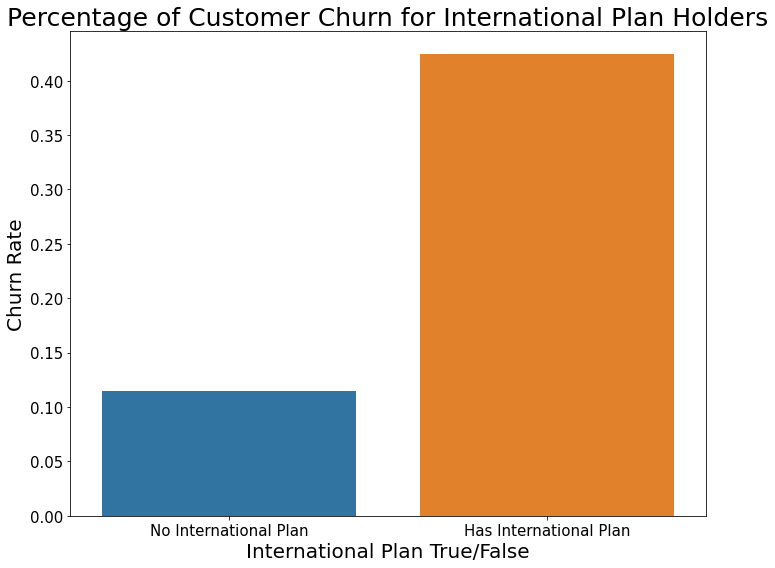

In [44]:
# plot and visualize based on International plan

fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x = 'international_plan', y = 'churn', data = df_clean.groupby('international_plan').mean().reset_index(), ax = ax)

plt.title('Percentage of Customer Churn for International Plan Holders', fontsize = 25)

ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('International Plan True/False', fontsize = 20)

plt.ylabel('Churn Rate', fontsize = 20)

ax.set_xticklabels(['No International Plan', 'Has International Plan'])

plt.tight_layout()

plt.savefig('img/International_Plan_Churn.png', bbox_inches = "tight")

It shows that there is a higher churn rate for those that have an International Plan compared to those that don't. At a rate of about 42%.

In [45]:
#  Customer Service Feature

df_clean.groupby("customer_service_calls").mean().reset_index()

,customer_service_calls,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn
0,0,101.30,0.12,0.28,8.14,181.84,100.90,30.91,201.02,100.10,17.09,202.22,99.50,9.10,10.39,4.44,2.81,0.13
1,1,101.78,0.09,0.29,8.43,179.45,101.05,30.51,202.42,100.13,17.21,200.16,100.49,9.01,10.15,4.54,2.74,0.10
2,2,99.23,0.08,0.28,8.29,176.75,99.26,30.05,200.32,100.39,17.03,200.95,101.43,9.04,10.28,4.48,2.78,0.11
3,3,101.43,0.09,0.23,6.83,183.32,99.92,31.16,198.02,98.81,16.83,202.28,99.00,9.10,10.14,4.50,2.74,0.10
4,4,102.66,0.13,0.25,7.50,184.27,101.78,31.33,202.07,102.10,17.18,199.10,97.17,8.96,10.22,4.30,2.76,0.46
5,5,102.56,0.09,0.26,7.26,175.36,99.52,29.81,198.09,101.47,16.84,191.94,97.73,8.64,10.59,4.42,2.86,0.61
6,6,90.18,0.00,0.41,12.91,151.01,97.36,25.67,197.07,92.14,16.75,202.19,99.59,9.10,10.05,3.32,2.71,0.64
7,7,116.11,0.00,0.22,7.67,156.01,88.11,26.52,218.64,107.67,18.58,202.06,110.44,9.09,9.80,4.67,2.65,0.56
8,8,83.50,0.00,0.50,20.00,180.30,120.50,30.65,200.90,107.50,17.07,195.00,99.00,8.77,8.15,6.00,2.20,0.50
9,9,102.50,0.50,0.50,10.00,233.05,118.50,39.62,193.10,108.50,16.41,246.20,102.00,11.07,12.15,2.50,3.28,1.00


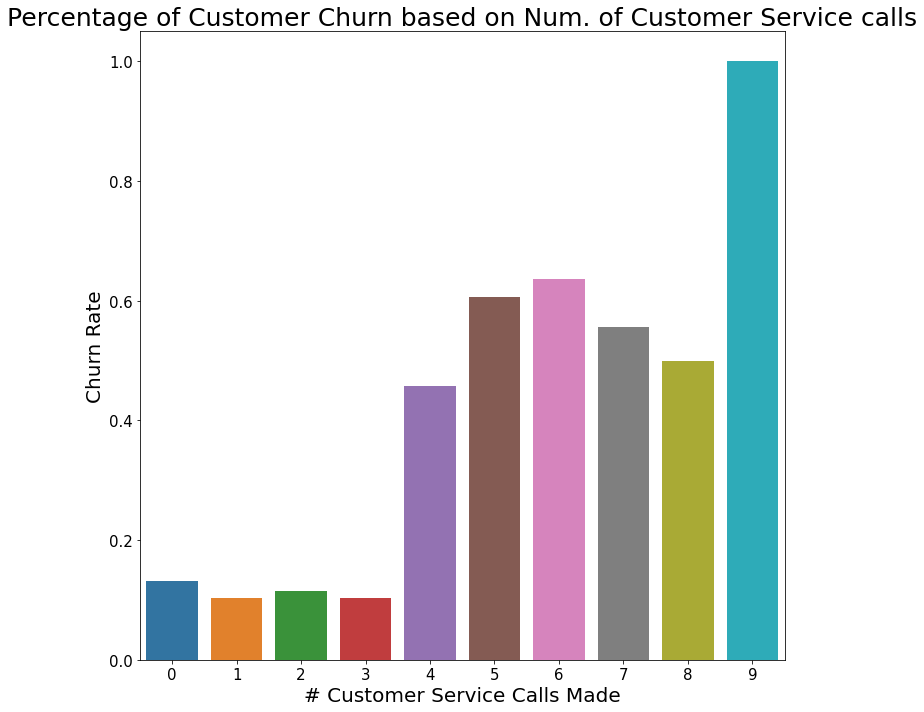

In [46]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y = 'churn', 
            data = df_clean.groupby("customer_service_calls").mean().reset_index(), 
            ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)

ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('# Customer Service Calls Made', fontsize = 20)

plt.ylabel('Churn Rate', fontsize = 20)

plt.tight_layout()

plt.savefig('img/Customer_Service_Call_Churn.png', bbox_inches = "tight")

The data and graph show that at around 4 customer service calls there is a huge spike in churn rate from below 20% up to 40% between customer call 3 and 4.  It stays above 40% up until 9 calls where it is 100%.

In [47]:
# Total Day Charge

df.groupby(['total_day_charge'])['churn'].mean()

total_day_charge
0.00    0.50
0.44    0.00
1.33    0.00
1.34    0.00
2.13    0.00
        ... 
57.04   1.00
57.36   1.00
58.70   1.00
58.96   1.00
59.64   1.00
Name: churn, Length: 1667, dtype: float64

In [48]:
# Total Day Charge in Descending order

df[['total_day_charge','churn']].sort_values('total_day_charge', ascending = False).head(50)

,total_day_charge,churn
365,59.64,True
985,58.96,True
2594,58.70,True
156,57.36,True
605,57.04,True
975,56.83,True
15,56.59,True
1679,56.07,True
2028,55.78,True
197,55.51,True


Shows that at above $54 100% of the customers churned

In [49]:
# Making a churn no churn column in a different data frame for a graph

df_churn_no_churn = df_clean.copy()

In [50]:
# Code to add churn no churn

def categorise(row):
    if row['churn'] == 1:
        return "churn"
    else:
        return 'no churn'
df_churn_no_churn["churn_no_churn"] = df.apply(lambda row: categorise(row), axis =1)

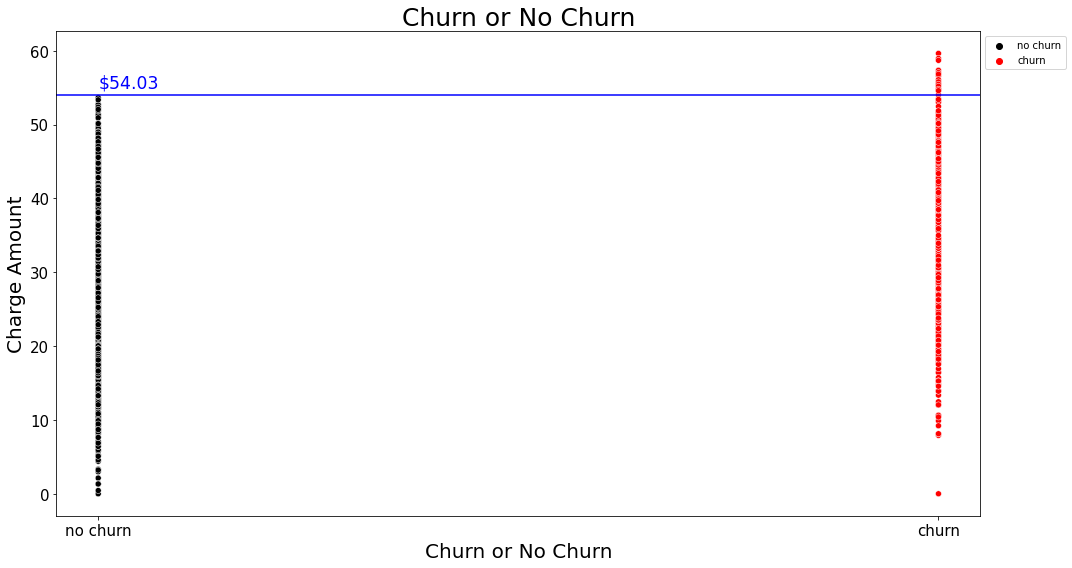

In [51]:
# Graph for churn NO Churn

fig, ax = plt.subplots(figsize=(15,8))
plt.title('Churn or No Churn', fontsize = 25)
sns.scatterplot(x="churn_no_churn",y="total_day_charge", data = df_churn_no_churn, hue = "churn_no_churn",
               palette = ['black', 'red'])
ax.axhline(54.03, color = 'blue')
plt.text(x = 'no churn',
         y= 55,
        s= "$54.03",
        color = 'blue',
        size = 'xx-large')
ax.tick_params(axis = 'both', labelsize = 15)
ax.legend(bbox_to_anchor = (1,1), loc = "upper left", borderaxespad = .5)
plt.xlabel('Churn or No Churn', fontsize = 20)
plt.ylabel("Charge Amount", fontsize = 20)
plt.tight_layout()

plt.savefig('img/Distribution_Total_Day_Charge.png', bbox_inches = "tight")

The data and plot shows that at around $54.03 that there is a 100% churn rate.

### 2.D Model 3 Decision Tree Refined

Running Base Decision Tree model with Data with important features from previous Decision Tree

In [52]:
# create X:
X = df_clean.drop(['state', 'churn', 'total_intl_charge', 'total_night_calls',
                  'total_day_calls', 'number_vmail_messages', 'account_length'], axis = 1)

# create y:
y = df_clean.churn

In [53]:
#Refined split:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .25, 
                                                    random_state = 42)

In [54]:
# SMOTE data set because it is uneven
sm = SMOTE(random_state = 42, sampling_strategy = .35)

# Fit and trsnform X_train and y_train using sm
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Scaled data

# Instantiat Scaler
scaler = StandardScaler()

#fit and transform X_train_smote
X_train_scaled_smote = scaler.fit_transform(X_train_smote)

#Transform X_test
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
# Decision Tree with refined data

dt = DecisionTreeClassifier(max_depth = 5, 
                            random_state = 42)
dt.fit(X_train_scaled_smote,y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=42)

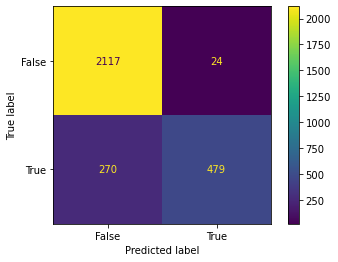

In [56]:
# Confusion matrix with refined data

plot_confusion_matrix(dt,X_train_scaled_smote,y_train_smote)

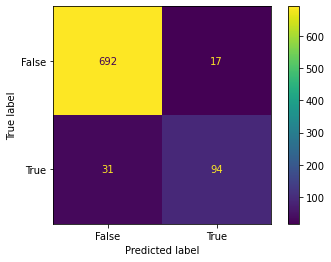

In [57]:
# Confusion matrix with refined data

plot_confusion_matrix(dt,X_test_scaled,y_test)

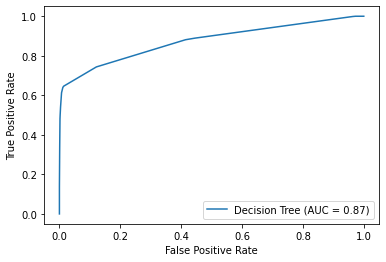

In [58]:
# Plot AUC for DT Refined

fig, ax = plt.subplots()

plot_roc_curve(dt, X_train_scaled_smote, y_train_smote, 
               name='Decision Tree', ax=ax)

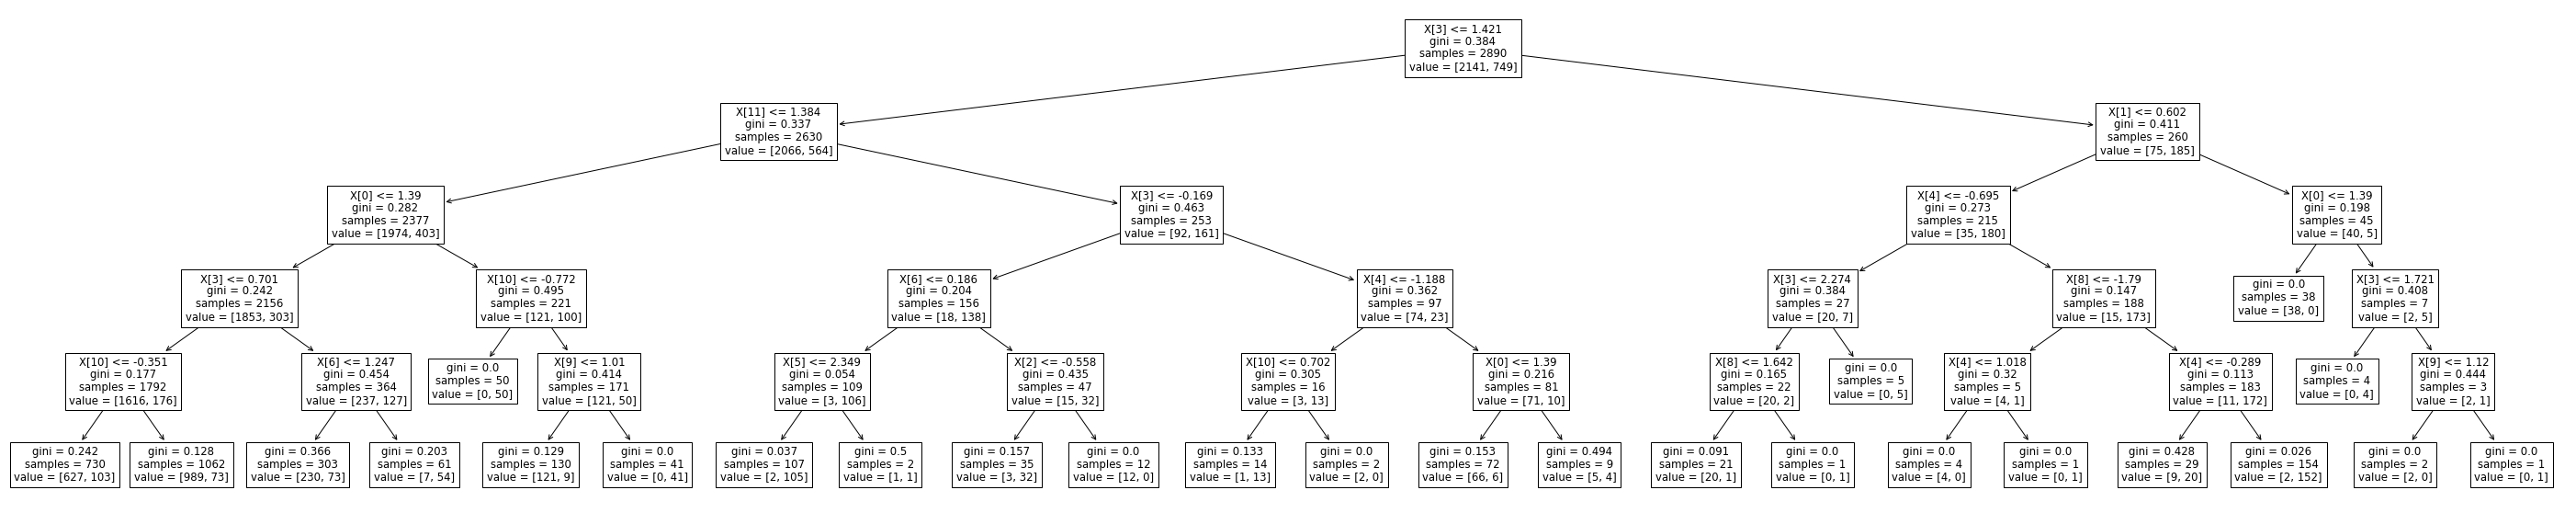

In [59]:
# Tree Plot with refined data

f, ax = plt.subplots(figsize=(50, 10))
plot_tree(dt, ax=ax);

In [60]:
# Recieve Accuracy, Recall, and Precision Scores

y_pred = dt.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 94.24460431654677
Recall: 75.2
Precision: 84.68468468468468
F1 Score: 79.66101694915254


All three measurements seem to have been reduced with the refined training data

### 2.E Model 4 Decision Tree Refined Grid Search

Running Grid Search to find best parameters

In [61]:
# Creating a GridSearchCV for Decision Tree

dt = DecisionTreeClassifier()

grid = {
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "splitter" : ["best", "random"], 
    "max_depth" : [1, 5, 10, 20],     
}

gs = GridSearchCV(estimator = dt,
                 param_grid=grid,
                 cv = 5)
gs.fit(X_train_scaled_smote, y_train_smote)

gs.best_params_

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on thi

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

In [62]:
gs.best_score_

0.8903114186851211

In [63]:
gs.best_estimator_.score(X_test_scaled, y_test)

0.9232613908872902

In [64]:
dt = DecisionTreeClassifier(criterion= "entropy",
                           max_depth= 10,
                           splitter= 'best')
dt.fit(X_train_scaled_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

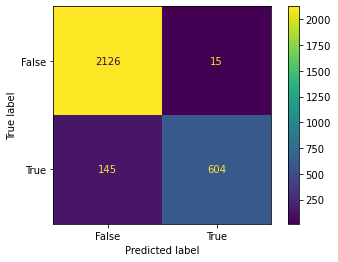

In [65]:
# Confusion matrix with refined data GridSearch

plot_confusion_matrix(dt,X_train_scaled_smote,y_train_smote)

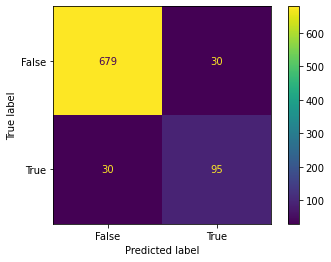

In [66]:
# Confusion matrix with refined data GridSearch

plot_confusion_matrix(dt,X_test_scaled,y_test)

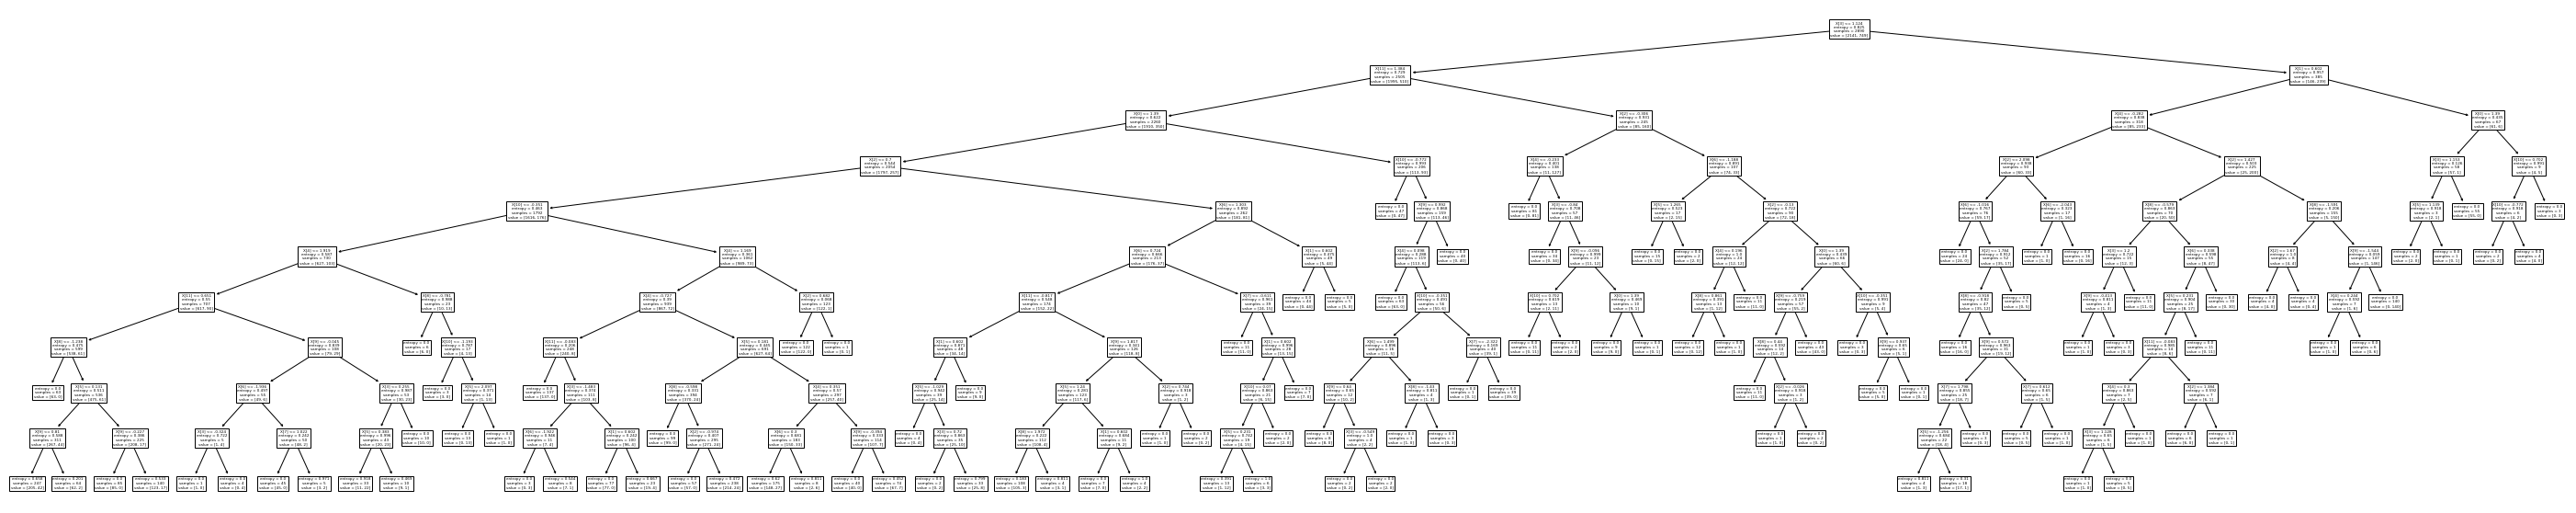

In [67]:
# Tree Plot with refined data GridSearch

f, ax = plt.subplots(figsize=(50, 10))
plot_tree(dt, ax=ax);

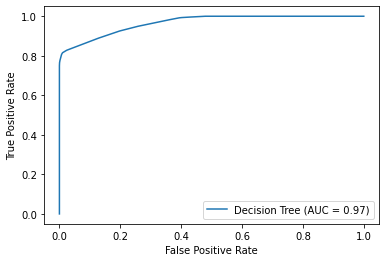

In [68]:
# Plot AUC for DT Grid Search

fig, ax = plt.subplots()

plot_roc_curve(dt, X_train_scaled_smote, y_train_smote, 
               name='Decision Tree', ax=ax)

In [69]:
# Recieve Accuracy, Recall, and Precision Scores

y_pred = dt.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 92.80575539568345
Recall: 76.0
Precision: 76.0
F1 Score: 76.0


Increased Accuracy and Precision, Decreased recall

### 2.F Model 5 Logistic Regression Refined

Running Logistic Regression to see if this model score higher for the particular data set

In [70]:
# Base Logitic Regression Model Refined Data

log_reg_no_penalty = LogisticRegression(random_state = 42, 
                                        penalty = 'none')

log_reg_no_penalty.fit(X_train_scaled_smote, y_train_smote)

LogisticRegression(penalty='none', random_state=42)

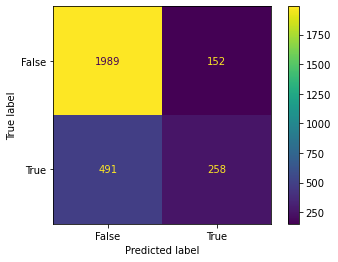

In [71]:
# Confusion Matrix of base logistic Regression refined data

plot_confusion_matrix(log_reg_no_penalty, X_train_scaled_smote, y_train_smote)

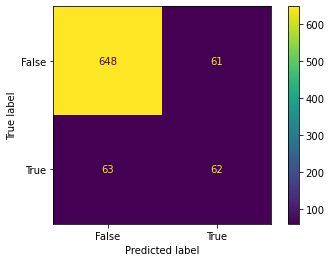

In [72]:
# Confusion Matrix of base logistic Regression refined data

plot_confusion_matrix(log_reg_no_penalty, X_test_scaled, y_test)

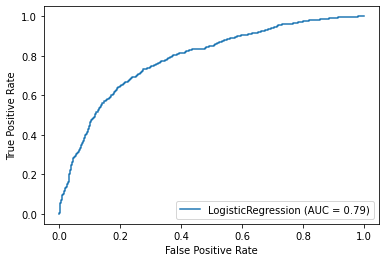

In [73]:
# AUC of base logistic Regression refined data

plot_roc_curve(log_reg_no_penalty, X_train_scaled_smote, y_train_smote);

In [74]:
# Recieve Accuracy, Recall, and Precision Scores

y_pred = log_reg_no_penalty.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 85.13189448441247
Recall: 49.6
Precision: 50.40650406504065
F1 Score: 50.0


We have gotten a lower score on everything when running a base Logistic Regression

### 2.G Model 6 Logistic Regression Refined Grid Search

Running Grid Search to find best parameters

In [75]:
# Grid search logistic Regression model refined data

grid = {
    'penalty' : ['none', 'l2'], 
    'tol' : [.01,1,10,25,50], 
    'solver' : ["newton-cg",'sag', 'saga'], 
    'max_iter' : [100,1000, 10000]
    
}

logreg = LogisticRegression()

gs = GridSearchCV(estimator = logreg, 
                 param_grid=grid, 
                 cv = 5)

In [76]:
gs.fit(X_train_scaled_smote,y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['none', 'l2'],
                         'solver': ['newton-cg', 'sag', 'saga'],
                         'tol': [0.01, 1, 10, 25, 50]})

In [77]:
gs.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'saga', 'tol': 25}

In [78]:
gs.best_score_

0.7816608996539792

In [79]:
gs.best_estimator_.score(X_test_scaled, y_test)

0.8561151079136691

In [80]:
# Logestic Regression Grid Search Refinded data

logreg_gridsearch = LogisticRegression(penalty= 'none', 
                                       max_iter= 100, 
                                       solver= 'sag', 
                                      tol= 25,
                                      random_state=42)
logreg_gridsearch.fit(X_train_scaled_smote,y_train_smote)

LogisticRegression(penalty='none', random_state=42, solver='sag', tol=25)

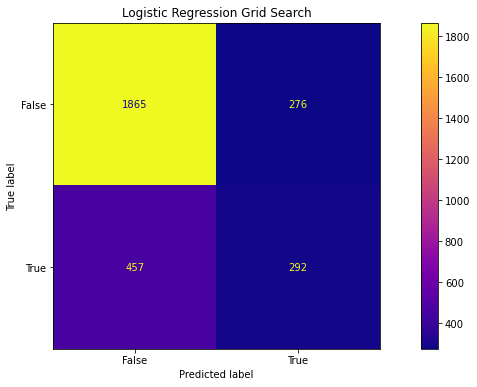

In [81]:
# Confusion Matrix Logistic Regression Grid Search Refined Data

fix, axes = plt.subplots(figsize=(15, 6))

axes.set_title("Logistic Regression Grid Search")

plot_confusion_matrix(logreg_gridsearch, X_train_scaled_smote, y_train_smote,
                      ax=axes, cmap="plasma")

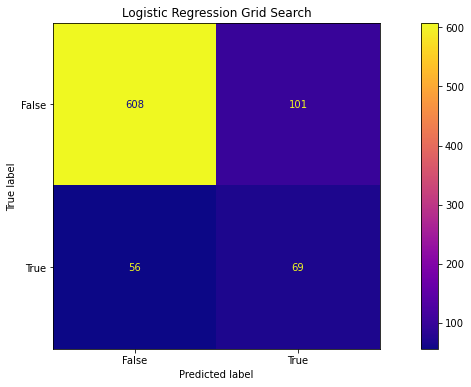

In [82]:
# Confusion Matrix Logistic Regression Grid Search Refined Data

fix, axes = plt.subplots(figsize=(15, 6))

axes.set_title("Logistic Regression Grid Search")

plot_confusion_matrix(logreg_gridsearch, X_test_scaled, y_test,
                      ax=axes, cmap="plasma")

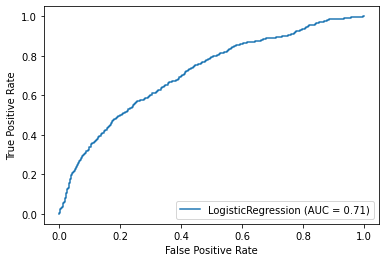

In [83]:
# AUC of  logistic Regression Grid Search refined data

plot_roc_curve(logreg_gridsearch, X_train_scaled_smote, y_train_smote);

In [84]:
# Recieve Accuracy, Recall, and Precision Scores

y_pred = logreg_gridsearch.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 81.17505995203837
Recall: 55.2
Precision: 40.588235294117645
F1 Score: 46.779661016949156


Slightly better results than base logistic regression model

### 2.H Model 7 KNN Refined Data

Running KNN to see if better model for this data set

In [85]:
# Base KNN refined data

knn = KNeighborsClassifier()

knn.fit(X_train_scaled_smote, y_train_smote)

KNeighborsClassifier()

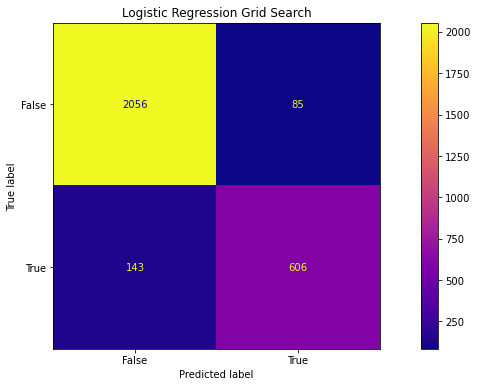

In [86]:
# Confusion Matrix KNN Refined Data

fix, axes = plt.subplots(figsize=(15, 6))

axes.set_title("Logistic Regression Grid Search")

plot_confusion_matrix(knn, X_train_scaled_smote, y_train_smote,
                      ax=axes, cmap="plasma")

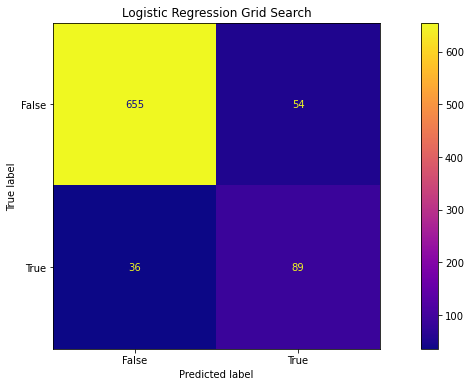

In [87]:
# Confusion Matrix KNN Refined Data

fix, axes = plt.subplots(figsize=(15, 6))

axes.set_title("Logistic Regression Grid Search")

plot_confusion_matrix(knn, X_test_scaled, y_test,
                      ax=axes, cmap="plasma")

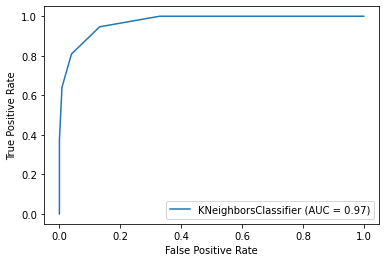

In [88]:
# AUC of KNN refined data

plot_roc_curve(knn, X_train_scaled_smote, y_train_smote);

In [89]:
# Recieve Accuracy, Recall, and Precision Scores

y_pred = knn.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 89.20863309352518
Recall: 71.2
Precision: 62.23776223776224
F1 Score: 66.4179104477612


Better score than Logistic Regression but lower score the Decision Tree

### 2.I KNN Grid Search Refined Data

Running Grid Search to find best parameters

In [90]:
# Grid search logistic Regression model refined data

grid = {
    'n_neighbors' : [1,3,5,7,10],
    'weights' : ["uniform", "distance"],
    'algorithm' : ['auto', "ball_tree", 'kd_tree', 'brute'],
    'metric' :  ['minkowski', 'euclidean', 'manhattan', "chebyshev", "seuclidean", "mahalanobis" ]
    
}

knn = KNeighborsClassifier()

gs = GridSearchCV(estimator = knn, 
                 param_grid=grid, 
                 cv = 5)

In [91]:
gs.fit(X_train_scaled_smote,y_train_smote)

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_d

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_d

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'seuclidean' not valid. Use sorted(sklearn.neighbors.VALID_ME

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1451: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1451: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1451: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1451: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' 

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1451: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1451: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1451: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1451: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' 

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahala

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahala

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'seuclidean', 'mahalanobis'],
                         'n_neighbors': [1, 3, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

In [92]:
gs.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 10,
 'weights': 'distance'}

In [93]:
gs.best_score_

0.9013840830449829

In [94]:
gs.best_estimator_.score(X_test_scaled, y_test)

0.9064748201438849

In [95]:
knn= KNeighborsClassifier(algorithm= "auto",
                         metric= 'chebyshev',
                         n_neighbors = 10,
                         weights= 'uniform')
knn.fit(X_train_scaled_smote, y_train_smote)

KNeighborsClassifier(metric='chebyshev', n_neighbors=10)

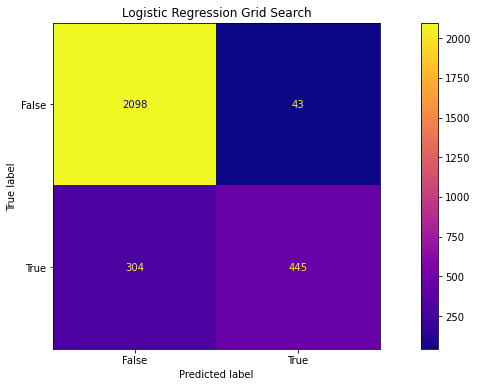

In [96]:
# Confusion Matrix KNN Grid Search Refined Data

fix, axes = plt.subplots(figsize=(15, 6))

axes.set_title("Logistic Regression Grid Search")

plot_confusion_matrix(knn, X_train_scaled_smote, y_train_smote,
                      ax=axes, cmap="plasma")

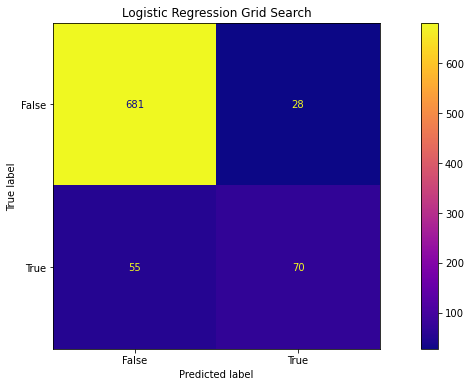

In [97]:
# Confusion Matrix KNN Refined Data

fix, axes = plt.subplots(figsize=(15, 6))

axes.set_title("Logistic Regression Grid Search")

plot_confusion_matrix(knn, X_test_scaled, y_test,
                      ax=axes, cmap="plasma")

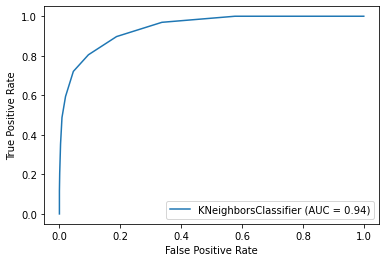

In [98]:
# AUC of KNN Gride Search refined data

plot_roc_curve(knn, X_train_scaled_smote, y_train_smote);

In [99]:
# Recieve Accuracy, Recall, and Precision Scores

y_pred = knn.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 90.04796163069544
Recall: 56.00000000000001
Precision: 71.42857142857143
F1 Score: 62.78026905829596


Higher Accuracy and Precision Score but lower Recall Score

### 2.J Final Model Base Decision Tree Grid Search on refined data set

In [101]:
# create X:
X = df_clean.drop(['state', 'churn', 'total_intl_charge', 'total_night_calls',
                  'total_day_calls', 'number_vmail_messages', 'account_length'], axis = 1)

# create y:
y = df_clean.churn

# Final split:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .25, 
                                                    random_state = 42)

# SMOTE data set because it is uneven
sm = SMOTE(random_state = 42, sampling_strategy = .35)

# Fit and trsnform X_train and y_train using sm
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Scaled data

# Instantiat Scaler
scaler = StandardScaler()

#fit and transform X_train_smote
X_train_scaled_smote = scaler.fit_transform(X_train_smote)

#Transform X_test
X_test_scaled = scaler.fit_transform(X_test)

# Running Decision Tree

dt = DecisionTreeClassifier(criterion= "entropy",
                           max_depth= 10,
                           splitter= 'best')
dt.fit(X_train_scaled_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

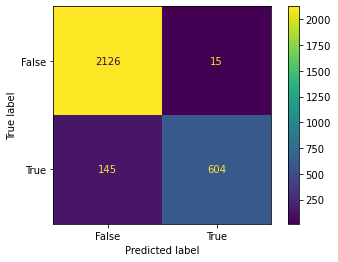

In [102]:
# Plot Confusion Matrix Train Data

plot_confusion_matrix(dt,X_train_scaled_smote,y_train_smote)

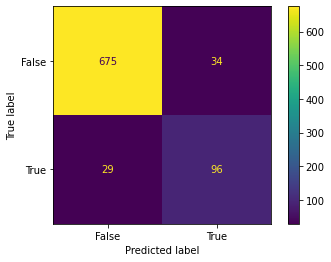

In [103]:
# Plot Confusion Matrix Test Data

plot_confusion_matrix(dt,X_test_scaled,y_test)

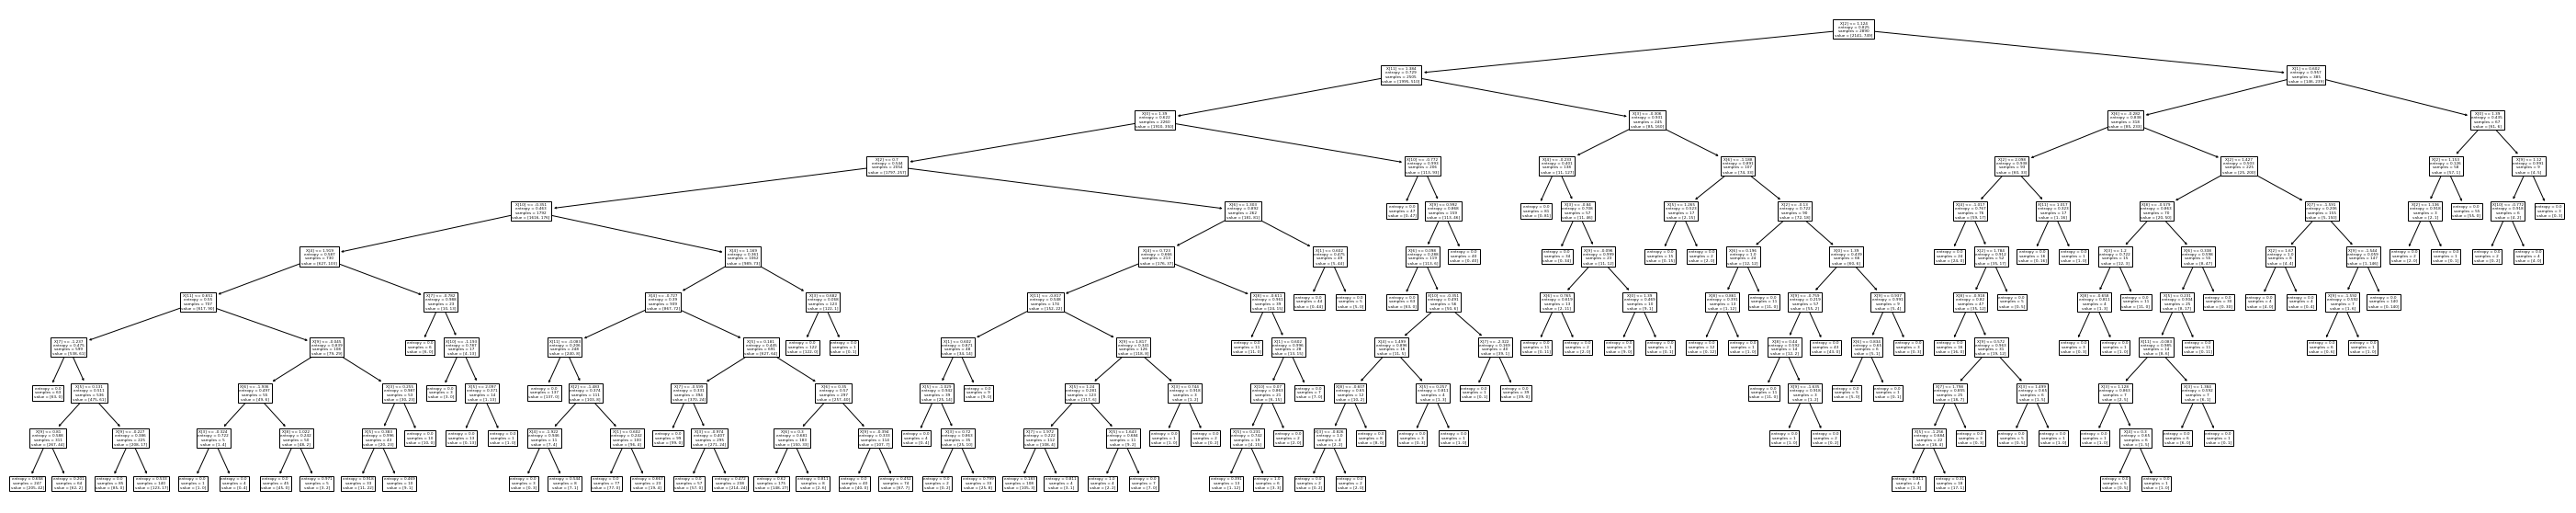

In [104]:
# Plot Decision Tree

f, ax = plt.subplots(figsize=(50, 10))
plot_tree(dt, ax=ax);

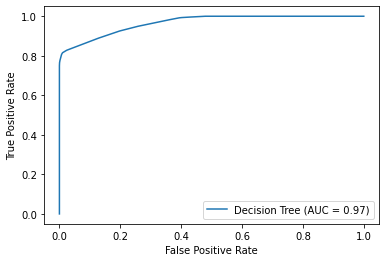

In [105]:
# Plot AUC for DT

fig, ax = plt.subplots()

plot_roc_curve(dt, X_train_scaled_smote, y_train_smote, 
               name='Decision Tree', ax=ax)

In [106]:
# Recieve Accuracy, Recall, and Precision Scores

y_pred = dt.predict(X_test_scaled)
y_pred

acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1_scores = f1_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))
print("Recall: {0}".format(recall))
print("Precision: {0}".format(precision))
print("F1 Score: {0}".format(f1_scores))

Accuracy: 92.44604316546763
Recall: 76.8
Precision: 73.84615384615385
F1 Score: 75.29411764705883


This Model was chosen as the Final Model because it was the best performing model that was tested on the data set that was Scaled and SMOTE.  It had the highest Recall score of 76.8% and whole 20% more than its next nearest competitor.  This is important for the subject at hand because we want to reduce the number of False Negatives or customers that churn, but are indicated as not churning for our models.  Losing these customer/users is more important the falsely identifying someone that wouldn't churn as someone that does.

##  3 Final Model and Conclusion

Our best model was derived from the initial Decision Tree with the OneHotEncoded States and all the numeric features.  The scoring was Accuracy: 92%, Recall: 76.8%, and Precision: 73% with an AUC : 97%.  About 3.5% of the prediction on the test data are found as False Negatives.  This score could probably be further improved on if we had the time to run through the full data set that wasn't refined from the decision tree or able to run Bagging or Ensembel models to get a better scoring.  Although in most cases Grid Searching increased the scoring on the model, but in the cases of KNN and Decision Tree the Grid search model decreased the Recall score and increased the accuracy and precision score.  Which indicated that there was an increase in TP, but also and increase in FP.

### 3.A Reccomendations 
1. Research should be done on why Customer Service was called so many time by users and why it wasn't fixed in the first few occurences to reduce Churn.
2. Research on why users with an International Plan have such a high churn rate of 42% and what the underlaying factors of the International plan that cause this.
3. Investigate why the churn rate was 100% for users that spent more the $54 dollars on day time charges.  Introduce a lower rate for day time charges to increase customer retention or have promotions for users that spend over 50.



### 3.B Next Steps
1. Have the data set explain what each column refers to instead of having vague features without clearly defined units.
2. Have more information on the type of customer that utilizes this telephone company because Syria Telecommunications is a Syrian Telecommunications company, but the data set only showed American based users.
3. More information on specifically the reasons for the customer service calls to see if there where repeat incidents or multiple separate incidences.